# NCI Data Access: Python GeoTIFF

**The following will go through how to:** <br \>
   1. Read and extract data from an example raster (.tif) file using Rasterio and GDAL. 
   2. Simple plotting of extracted data
   3. More advanced plotting using `Cartopy` and creating RGB images


## Load required modules if working on Raijin and/or the VDI (Virtual Desktop Infrastructure)
Additional modules are needed for some of the python libraries used in this example. 

```
$ module load python/2.7.5 
$ module load gdal/1.11.1-python 
$ module load python/2.7.5-matplotlib

```

**Note:** If using a python virtual environment, these modules should be loaded before activating the working environment. 

## Load required python libraries

**Note:** Rasterio is not part of any Raijin/VDI modules and has to be installed by the user. 

In [1]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fn = '/g/data2/rs0/tiles/EPSG4326_1deg_0.00025pixel/LS8_OLI/116_-034/2015/LS8_OLI_FC_116_-034_2015-03-02T02-05-26.tif'

## GDAL example

#### Open file

In [3]:
ds2 = gdal.Open(fn)

In [4]:
cols = ds2.RasterXSize
rows = ds2.RasterYSize
bands = ds2.RasterCount

print "Cols: {0}, Rows: {1}, Bands: {2}".format(cols, rows, bands)

Cols: 4000, Rows: 4000, Bands: 4


#### Using the 'GetGeoTransform' we can calculate the spatial extents

In [5]:
geoTransform = ds2.GetGeoTransform()
minx = geoTransform[0]
maxy = geoTransform[3]
maxx = minx + geoTransform[1]*ds2.RasterXSize
miny = maxy + geoTransform[5]*ds2.RasterYSize
print "Spatial extent [minx,miny,maxx,maxy]: ", [minx,miny,maxx,maxy]

Spatial extent [minx,miny,maxx,maxy]:  [116.0, -34.0, 117.0, -33.0]


#### What these transform values mean:
```
transform[0] /* top left x */
transform[1] /* w-e pixel resolution */
transform[2] /* rotation, 0 if image is "north up" */
transformm[3] /* top left y */
transform[4] /* rotation, 0 if image is "north up" */
transform[5] /* n-s pixel resolution */ ```

#### Extract a band subset

In [6]:
x1, x2 = 2500, 4000
y1, y2 = 2000, 4000

In [7]:
band3 = ds2.GetRasterBand(3).ReadAsArray()[x1:x2, y1:y2]

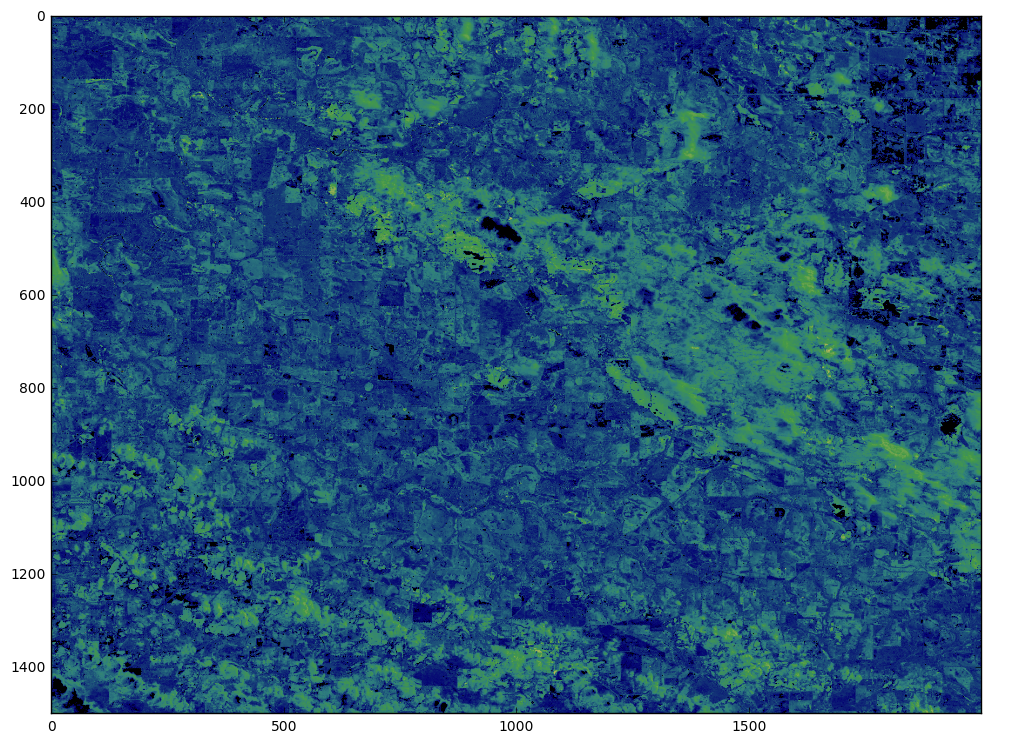

In [8]:
fig = plt.figure(figsize=(12,12))
plt.imshow(band3, cmap='gist_earth')

## Rasterio example (uses GDAL)
For more info on Rasterio: https://pypi.python.org/pypi/rasterio


In [9]:
import rasterio

In [10]:
ds = rasterio.open(fn)
ds.meta

{'affine': Affine(0.00025, 0.0, 116.0,
       0.0, -0.00025, -33.0),
 'count': 4,
 'crs': CRS({'init': u'epsg:4326'}),
 'driver': u'GTiff',
 'dtype': 'int16',
 'height': 4000,
 'nodata': -999.0,
 'transform': (116.0, 0.00025, 0.0, -33.0, 0.0, -0.00025),
 'width': 4000}

In [11]:
print "Number of bands: ", ds.count

Number of bands:  4


In [12]:
print "Height:\t ", ds.height
print "Width:\t ", ds.width
print "CRS:\t ", ds.crs

Height:	  4000
Width:	  4000
CRS:	  CRS({'init': u'epsg:4326'})


In [13]:
print "BoundingBox: ", ds.bounds

BoundingBox:  BoundingBox(left=116.0, bottom=-34.0, right=117.0, top=-33.0)


### Extract (read) and plot a selected band

In [14]:
data = ds.read(3)

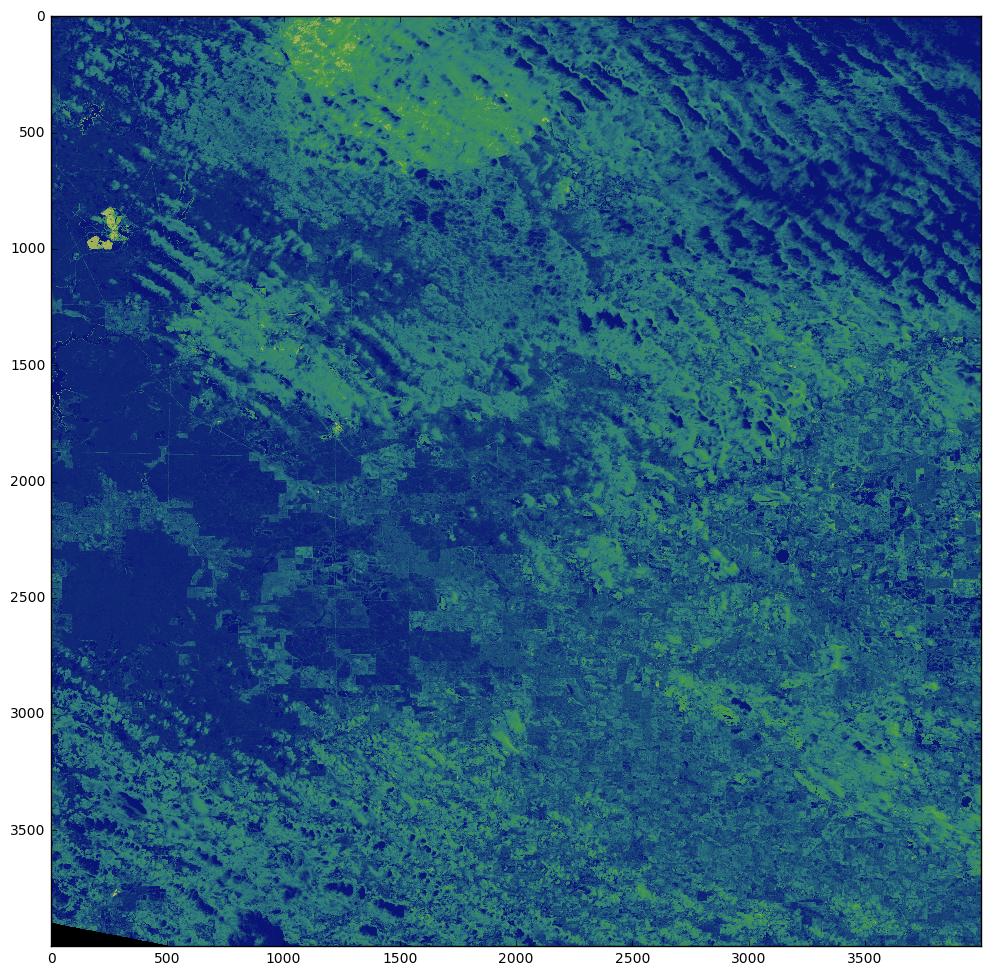

In [15]:
fig = plt.figure(figsize=(12,12))
plt.imshow(data, cmap='gist_earth')

### Extract small subset

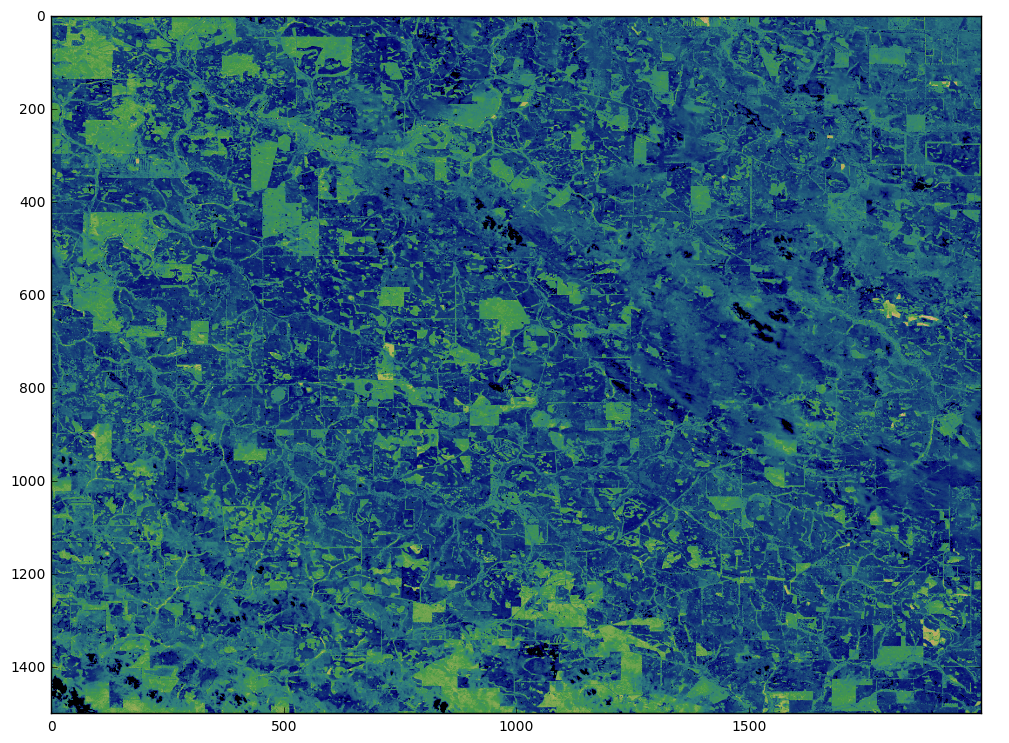

In [16]:
x1, x2 = 2500, 4000
y1, y2 = 2000, 4000

small_data = ds.read(1, window=((x1,x2), (y1,y2)))
fig = plt.figure(figsize=(12,12))
plt.imshow(small_data, cmap='gist_earth')